In [8]:
'''Dependencies'''
import os
import sys
import timeit
import matplotlib
matplotlib.use("Agg") #for server running
import time
import numpy as np
from load import mnist
import theano
import theano.tensor as T
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams
import pylab
from logistic_sgd import LogisticRegression, load_data
from mlp import HiddenLayer
from sparse_dae import dA
from sparse_sda import Stacked_denoising_autoencoder

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [9]:

'''Hyperparameters'''

pretraining_batch_size = 128 #128
num_pretraining_epochs = 25 #25
pretraining_lr = 0.15
corruption_levels = [0.1,0.1,0.1]
hidden_layer_dims = [900,900,900]
primary_submission= False
#####################################################
pretraining_mom = 0.01
penalty_parameter = 0.9
sparsity_constraint = 0.04
with_momentum = False
################################################
classification_training_epochs = 50 #25
classification_lr = 0.1
classification_act = "sigmoid"

auto_enc_hyperparameters= [pretraining_lr, pretraining_batch_size, num_pretraining_epochs, corruption_levels]
classification_hyperparameters = [classification_training_epochs, classification_lr]

In [10]:
"""Theano dataset loading """
def shared_dataset(data_xy, borrow=True):
        data_x, data_y = data_xy
        shared_x = theano.shared(np.asarray(data_x, dtype=theano.config.floatX), borrow=borrow)
        shared_y = theano.shared(np.asarray(data_y, dtype=theano.config.floatX), borrow=borrow)
        return shared_x, T.cast(shared_y, 'int32')
    
    
    
"""Loading dataset"""

print("Loading dataset")
trX, teX, trY, teY = mnist(onehot=False)
trX, trY = trX[:12000], trY[:12000]
teX, teY = teX[:2000], teY[:2000]



Loading dataset


In [11]:
trX.shape

(12000, 784)

In [12]:
trX_tensor, trY_tensor = shared_dataset((trX,trY))
teX_tensor, teY_tensor = shared_dataset((teX, teY))
train_tuple = (trX_tensor, trY_tensor)
test_tuple = (teX_tensor, teY_tensor)
n_train_batches = trX_tensor.get_value(borrow=True).shape[0]
batch_size = pretraining_batch_size
n_train_batches //= pretraining_batch_size


In [13]:

'''Hyperparameters'''

pretraining_batch_size = 128#128
num_pretraining_epochs = 25#25
pretraining_lr = 0.1
corruption_levels = [0.1,0.1,0.1]
hidden_layer_dims = [900,900,900]
primary_submission= False
#####################################################
pretraining_mom = 0.1
penalty_parameter = 0.5
sparsity_constraint = 0.05
################################################
classification_training_epochs = 25#25
classification_lr = 0.1
classification_act = "sigmoid"

auto_enc_hyperparameters= [pretraining_lr, pretraining_batch_size, num_pretraining_epochs, corruption_levels]
classification_hyperparameters = [classification_training_epochs, classification_lr]

hyperparameter_string=  "Alpha:{}; Batch_size:{}; Num_epochs:{}; Corruption:{}; Penalty:{}; Sparsity:{}; Momentum:{} ".format(str(auto_enc_hyperparameters[0]), str(auto_enc_hyperparameters[1]), str(auto_enc_hyperparameters[2]), str(auto_enc_hyperparameters[3][0]),penalty_parameter, sparsity_constraint, pretraining_mom)
if(primary_submission):
    hyperparameter_string = "Assignment_params"+hyperparameter_string

print("Hyperparameters:")
print(hyperparameter_string)
os_dir = "./plots_part2/noise_reconstruction/sparse_hyperparameters:{}".format(hyperparameter_string)+"layer_size_900_900_900"
if(os.path.exists(os_dir)):
    os_dir = "./plots_part2/noise_reconstruction/2ndRUN_sparse_hyperparameters:{}".format(hyperparameter_string)
    os.makedirs(os_dir)
else:
    os.makedirs(os_dir)
plots_dir = os_dir

Hyperparameters:
Alpha:0.1; Batch_size:128; Num_epochs:25; Corruption:0.1; Penalty:0.5; Sparsity:0.05; Momentum:0.1 


Building model
Training sparse stacked denoising autoencoder layer by layer (unsupervised)
Pre-training layer 0, epoch 0, cost 168.986007
Pre-training layer 0, epoch 1, cost 120.699587
Pre-training layer 0, epoch 2, cost 109.191877
Pre-training layer 0, epoch 3, cost 102.777089
Pre-training layer 0, epoch 4, cost 98.719940
Pre-training layer 0, epoch 5, cost 95.717380
Pre-training layer 0, epoch 6, cost 93.424212
Pre-training layer 0, epoch 7, cost 91.645517
Pre-training layer 0, epoch 8, cost 90.057388
Pre-training layer 0, epoch 9, cost 88.747973
Pre-training layer 0, epoch 10, cost 87.638163
Pre-training layer 0, epoch 11, cost 86.645250
Pre-training layer 0, epoch 12, cost 85.742482
Pre-training layer 0, epoch 13, cost 85.041021
Pre-training layer 0, epoch 14, cost 84.266077
Pre-training layer 0, epoch 15, cost 83.736724
Pre-training layer 0, epoch 16, cost 83.064651
Pre-training layer 0, epoch 17, cost 82.579716
Pre-training layer 0, epoch 18, cost 82.044047
Pre-training layer 0, 

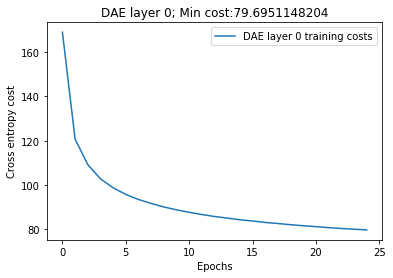

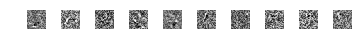

Pre-training layer 1, epoch 0, cost 236.453214
Pre-training layer 1, epoch 1, cost 186.276810
Pre-training layer 1, epoch 2, cost 174.337243
Pre-training layer 1, epoch 3, cost 167.396259
Pre-training layer 1, epoch 4, cost 162.554937
Pre-training layer 1, epoch 5, cost 158.902706
Pre-training layer 1, epoch 6, cost 156.006896
Pre-training layer 1, epoch 7, cost 153.674820
Pre-training layer 1, epoch 8, cost 151.807833
Pre-training layer 1, epoch 9, cost 150.269460
Pre-training layer 1, epoch 10, cost 148.791807
Pre-training layer 1, epoch 11, cost 147.451055
Pre-training layer 1, epoch 12, cost 146.498071
Pre-training layer 1, epoch 13, cost 145.398396
Pre-training layer 1, epoch 14, cost 144.607729
Pre-training layer 1, epoch 15, cost 143.841659
Pre-training layer 1, epoch 16, cost 143.163858
Pre-training layer 1, epoch 17, cost 142.503583
Pre-training layer 1, epoch 18, cost 141.844451
Pre-training layer 1, epoch 19, cost 141.464595
Pre-training layer 1, epoch 20, cost 141.000925
Pr

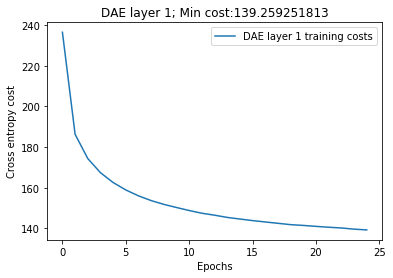

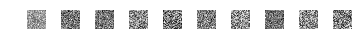

Pre-training layer 2, epoch 0, cost 235.527173
Pre-training layer 2, epoch 1, cost 186.100167
Pre-training layer 2, epoch 2, cost 175.561496
Pre-training layer 2, epoch 3, cost 169.219702
Pre-training layer 2, epoch 4, cost 164.809591
Pre-training layer 2, epoch 5, cost 161.516280
Pre-training layer 2, epoch 6, cost 158.886317
Pre-training layer 2, epoch 7, cost 156.861259
Pre-training layer 2, epoch 8, cost 155.171591
Pre-training layer 2, epoch 9, cost 153.458640
Pre-training layer 2, epoch 10, cost 152.457258
Pre-training layer 2, epoch 11, cost 151.195041
Pre-training layer 2, epoch 12, cost 150.242286
Pre-training layer 2, epoch 13, cost 149.355819
Pre-training layer 2, epoch 14, cost 148.694264
Pre-training layer 2, epoch 15, cost 147.936145
Pre-training layer 2, epoch 16, cost 147.361561
Pre-training layer 2, epoch 17, cost 146.780203
Pre-training layer 2, epoch 18, cost 146.195585
Pre-training layer 2, epoch 19, cost 145.754897
Pre-training layer 2, epoch 20, cost 145.392999
Pr

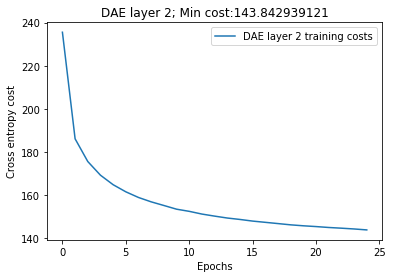

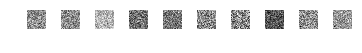

Unsupervised training took 2317.15065289 seconds for 25 epochs
Producing plots for autoencoder with testing set


In [14]:
 
"""Building stacked autoencoder model"""
numpy_rng = np.random.RandomState(123)
print("Building model")
sda = Stacked_denoising_autoencoder(numpy_rng =numpy_rng, n_ins = 28*28, hidden_layer_dims=hidden_layer_dims, n_outs= 10, corruption_levels = corruption_levels, activation_func= T.nnet.sigmoid)


'''Plot functions'''

def plot_autoencoder_costs(epoch_cost, layer_no):
    autoencoder_layer_str = "dae_layer{}".format(str(layer_no))
    label = "DAE layer {} training costs".format(layer_no)
    title = "DAE layer {}; Min cost:{}".format(layer_no, str(np.min(epoch_cost)))
    #pylab.figure(figsize=(15,8))
    pylab.figure()
    pylab.plot(range(len(epoch_cost)), epoch_cost, label = label)
    pylab.xlabel('Epochs')
    pylab.ylabel('Cross entropy cost')
    pylab.title(title)
    pylab.legend()
    
    pylab.savefig(os.path.join(plots_dir,autoencoder_layer_str+"Costs.png"), dpi = 300)
    pylab.show()

    
def plot_autoencoder_weights(weights, layer_no):
    autoencoder_layer_str = "dae_layer{}".format(str(layer_no))
    title = "Weights for DAE layer {}".format(layer_no)
    #pylab.figure(figsize=(15,8))
    pylab.figure()
    pylab.gray()
    shape_of_figure = int(np.sqrt(weights.shape[0]))
    for i in range(10):
        pylab.subplot(10, 10, i+1); pylab.axis('off'); pylab.imshow(weights[:,i].reshape(shape_of_figure,shape_of_figure))
    pylab.savefig(os.path.join(plots_dir, autoencoder_layer_str+"Weights.png"), dpi = 300)
    pylab.show()
    
def plot_matrix_as_image(matrix, output_name):
    pylab.figure()
    pylab.gray()
    shape_of_figure = int(np.sqrt(matrix.shape[1])) #so if 10*784 is passed
    for i in range(10):
        pylab.subplot(10,10,i+1); pylab.axis('off'); pylab.imshow(matrix[i,:].reshape(shape_of_figure, shape_of_figure))
    pylab.savefig(os.path.join(plots_dir, output_name+'.png'), dpi = 300)
    pylab.show()
    


def plot_classification_results(epoch_cost,epoch_acc):
    label = "Classification training cost"
    title = "Classification training cost"
    pylab.figure()
    pylab.plot(range(len(epoch_cost)), epoch_cost, label = label)
    pylab.xlabel('Epochs')
    pylab.ylabel('Cross entropy cost')
    pylab.title(title+"; Min cost: {}".format(np.min(epoch_cost)))
    pylab.legend()
    pylab.savefig(os.path.join(plots_dir,title+".png"), dpi = 300)
    pylab.show()
    
    label = "Classification testing accuracy"
    title = "Classification testing accuracy"
    pylab.figure()
    pylab.plot(range(len(epoch_acc)), epoch_acc, label = label)
    pylab.xlabel('Epochs')
    pylab.ylabel('Classification accuracy')
    pylab.title(title+"; Max accuracy: {}".format(np.max(epoch_acc)))
    pylab.legend()
    pylab.savefig(os.path.join(plots_dir,title+".png"), dpi = 300)
    pylab.show()



    
"""Training autoencoder"""

pretraining_fns = sda.pretraining_da_fns(train_set_x=trX_tensor, batch_size=batch_size)


print('Training sparse stacked denoising autoencoder layer by layer (unsupervised)')
start_time = time.time()
    ## Pre-train layer-wise

for i in range(sda.n_layers):
        # go through pretraining epochs
    epoch_cost = []
    for epoch in range(num_pretraining_epochs):
        # go through the training set
        c = []
        for batch_index in range(n_train_batches):
            c.append(pretraining_fns[i](index=batch_index, corruption=corruption_levels[i],lr=pretraining_lr,sparsity= sparsity_constraint, penalty=penalty_parameter, momentum = pretraining_mom))
        print('Pre-training layer %i, epoch %d, cost %f' % (i, epoch, np.mean(c, dtype='float64')))
        epoch_cost.append(np.mean(c, dtype='float64'))
    plot_autoencoder_costs(epoch_cost, i)
    plot_autoencoder_weights(sda.dA_layers[i].W.get_value(),i)
    #plot_autoencoder_weights()

end_time = time.time()

print("Unsupervised training took {} seconds for {} epochs".format(end_time-start_time, num_pretraining_epochs))


print("Producing plots for autoencoder with testing set")
"""Testing for autoencoder"""

def sigmoid(z):
    return 1/(1+np.exp(-z))

def get_test_autoencoder_representations(test_set_100, num_layers, activation = sigmoid, noise=False, rot=False, extra_str=""):
    
    layer_params = []
    for i in range(num_layers): #go through each autoencoder
        layer = sda.activation_layers[i]
        if(i==0):
            layer_params.append((layer.W.get_value(), layer.b.get_value(), sda.dA_layers[i].b_prime.get_value()))
        else:
            layer_params.append((layer.W.get_value(), layer.b.get_value()))
    if(noise):
        op_str = "_noise"
    elif(rot):
        op_str = "_rot"
    else:
        op_str = ""
    plot_matrix_as_image(test_set_100,"inputs"+op_str)
    activation = test_set_100
    for i in range(num_layers):
        #first activation
        activation = sigmoid(np.dot(activation,layer_params[i][0])+layer_params[i][1])
        if(i==0):
            reconstructed_image = sigmoid(np.dot(activation,layer_params[i][0].transpose())+layer_params[i][-1])

        plot_matrix_as_image(activation, "layer{}_activation".format(i)+op_str)
    
    plot_matrix_as_image(reconstructed_image, "reconstructed_images"+op_str+extra_str)

       

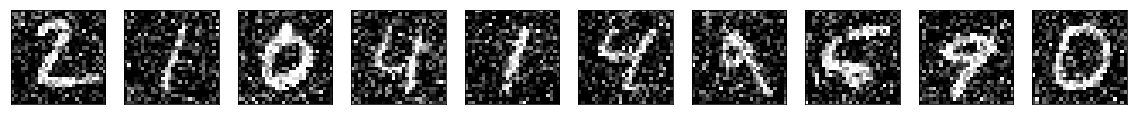

In [36]:
"""Noise reconstruction"""

noise_factor = 0.35
teX_noisy = teX+ noise_factor*np.random.normal(loc=0.0, scale=1.0, size=teX.shape)
teX_noisy = np.clip(teX_noisy, 0., 1.)
%matplotlib inline
import matplotlib.pyplot as  plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(teX_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

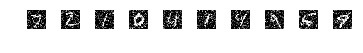

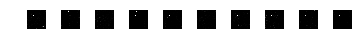

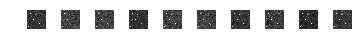

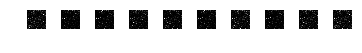

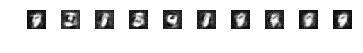

In [37]:
get_test_autoencoder_representations(teX_noisy[:100,:], len(sda.activation_layers), noise=True, extra_str = "Noise level:{}".format(noise_factor))

In [40]:
"""Rotation orientation"""
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
rotation_range = 30
datagen = ImageDataGenerator(rotation_range=rotation_range)
datagen.fit(X_test)
x_img = []
y_img = []
i =0 
for x_, y_ in datagen.flow(X_train, y_train, batch_size =1):
    i+=1
    if(i>100):
        break
    x_img.append(x_)

x_img = np.array(map(lambda x: x.reshape(28,28), x_img))
x_rot_img = np.array(map(lambda x: x.reshape(784), x_img))

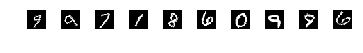

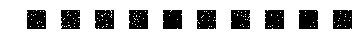

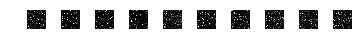

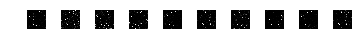

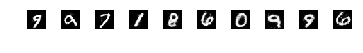

In [41]:
get_test_autoencoder_representations(x_rot_img[:10,:], len(sda.activation_layers),rot=True,extra_str="rot{}".format(rotation_range))